In [87]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import itertools
import pandas as pd

In [88]:
vsv_data = np.array([1, .7, .49, .343, .0343]) # VSV gradient
vsv_data_norm = vsv_data/np.sum(vsv_data)
vsv_data_norm


array([0.38951428, 0.27265999, 0.190862  , 0.1336034 , 0.01336034])

In [89]:
measles_data_mean = np.array([26800, 9100, 6700, 5400, 4000, 400]) # Measles gradient
measles_data_mean_norm = measles_data_mean/np.sum(measles_data_mean)
measles_data_mean_norm


array([0.51145038, 0.17366412, 0.1278626 , 0.10305344, 0.07633588,
       0.00763359])

In [90]:
PIV2_data = np.array([[49.73, 18.61, 12.10,10.87,6.09,2.43], # PIV2 gradients
                      [47.25,20.44,14.78,13.10,7.49,1.64],
                      [47.28,19.58,13.76,10.93,6.31,0.91],
                      [48.10,21.27,13.71,10.87,5.80,0.98]]).T
PIV2_data =PIV2_data/np.sum(PIV2_data, axis = 0)
PIV2_data_mean = np.mean(PIV2_data,axis = 1)
PIV2_data_sd = np.std(PIV2_data,axis = 1)
PIV2_data_mean_norm = PIV2_data_mean/np.sum(PIV2_data_mean)
PIV2_data_sd_norm = PIV2_data_sd/np.sum(PIV2_data_mean)
PIV2_data_mean_norm

array([0.47640956, 0.19775956, 0.13444782, 0.11314447, 0.06350172,
       0.01473687])

In [91]:
PIV5_data = np.array([[35.10, 21.76, 14.35,11.96,13.29, 6.08, 0.50], # PIV5 gradients
                      [35.08, 22.27,15.87, 11.09, 11.56, 5.95, 0.20],
                      [37.89, 20.49, 13.55, 10.68, 10.28, 6.11, 0],
                      [27.94, 15.92, 17.27, 14.48, 12.21, 11.82, 0.18]]).T
PIV5_data =PIV5_data/np.sum(PIV5_data, axis = 0)
PIV5_data_mean = np.mean(PIV5_data,axis = 1)
PIV5_data_sd = np.std(PIV5_data,axis = 1)
PIV5_data_mean_norm = PIV5_data_mean/np.sum(PIV5_data_mean)
PIV5_data_sd_norm = PIV5_data_sd/np.sum(PIV5_data_mean)
PIV5_data_mean_norm

array([0.33678241, 0.19898186, 0.15117604, 0.11942888, 0.11711218,
       0.07436461, 0.00215403])

In [92]:
PIV3_data = np.array([[32.28,19.57,20.74,16.17,10.61,1.35], # PIV3 gradients
                      [28.42,15.60,21.95,18.07,14.57,0.30],
                      [28.52,16.66,20.09,16.55,17.80,0.66],
                      [32.08,22.07,17.10,12.61,15.36,0.73]]).T
PIV3_data =PIV3_data/np.sum(PIV3_data, axis = 0)
PIV3_data_mean = np.mean(PIV3_data,axis = 1)
PIV3_data_sd = np.std(PIV3_data,axis = 1)
PIV3_data_mean_norm = PIV3_data_mean/np.sum(PIV3_data_mean)
PIV3_data_sd_norm = PIV3_data_sd/np.sum(PIV3_data_mean)
PIV3_data_mean_norm

array([0.30329713, 0.18474135, 0.19981523, 0.1586091 , 0.14595675,
       0.00758044])

In [93]:
MuV_data = np.array([[30.07,27.46,15.46,9.89,9.77,6.42,2.53], # Mumps gradients
                      [30.13,27.56,15.30,10.41,9.88,6.28,2.34],
                      [30.48,31.26,14.55,8.15,7.69,5.45,1.47],
                      [31.32,34.62,12.92,6.83,6.95,4.63,1.16]]).T
MuV_data = MuV_data/np.sum(MuV_data, axis = 0)
MuV_data_mean = np.mean(MuV_data,axis = 1)
MuV_data_sd = np.std(MuV_data,axis = 1)
MuV_data_mean_norm = MuV_data_mean/np.sum(MuV_data_mean)
MuV_data_sd_norm = MuV_data_sd/np.sum(MuV_data_mean)
MuV_data_mean_norm

array([0.30439141, 0.30201426, 0.14511721, 0.08779315, 0.08534133,
       0.05671981, 0.01862282])

In [94]:
# define list of virus names
viruses = ["VSV", "MeV", "PIV2", "PIV3", "PIV5", "MuV"]
# define list of virus genes and their orders
virus_gene_names = [
    ['N', 'P', 'M', 'G', 'L'],
    ['N', 'P', 'M', 'F', "H", 'L'],
    ['NP', 'VIP', 'M', 'F', "HN", 'L'],
    ['NP', 'P/D/C', 'M', 'F', "HN", 'L'], 
    ['NP', 'VIP', 'M', 'F', "SH","HN", 'L'],
    ['NP', 'V/P', 'M', 'F', "SH","HN", 'L']]
# define list of mean expression of each gene for each virus
virus_means = [vsv_data_norm, measles_data_mean_norm, PIV2_data_mean_norm, PIV3_data_mean_norm, PIV5_data_mean_norm,
              MuV_data_mean_norm,EBOV_data_mean_norm, MV_data_mean_norm, RSV1_data_mean_norm, RSV2_data_mean_norm]

# define list of sd of expression of each gene for each virus. 0 implies that this was not available
virus_sd = [[0,0,0,0,0], [0,0,0,0,0,0], PIV2_data_sd_norm, PIV3_data_sd_norm, PIV5_data_sd_norm,
              MuV_data_sd_norm, EBOV_data_sd_norm, MV_data_sd_norm, [0,0,0,0,0,0,0,0,0,0], RSV2_data_sd_norm]




In [95]:
# define lists of position of gene stop signal for each gene
VSV_genome_pos = np.array([1376, 2199, 3039, 4713, 11095])
VSV_genome_pos = np.array(VSV_genome_pos - np.min(VSV_genome_pos))
VSV_genome_pos

#
measles_genome_pos =  np.array([1744,3402,4872,7247,9208,15854])
measles_genome_pos = np.array(measles_genome_pos - np.min(measles_genome_pos))
measles_genome_pos

#
PIV2_genome_pos =  np.array([1915, 3361,4738,6626,8738,15621])
PIV2_genome_pos = np.array(PIV2_genome_pos - np.min(PIV2_genome_pos))
PIV2_genome_pos

#
PIV3_genome_pos =  np.array([1658, 3595,4814,6691,8524,15347])
PIV3_genome_pos = np.array(PIV3_genome_pos - np.min(PIV3_genome_pos))
PIV3_genome_pos

#
PIV5_genome_pos =  np.array([1787, 3092,4478,6219,6515,8392,15215])
PIV5_genome_pos = np.array(PIV5_genome_pos - np.min(PIV5_genome_pos))
PIV5_genome_pos

#
MuV_genome_pos =  np.array([1906, 3226,4481,6210, 6533, 8428, 15360])
MuV_genome_pos = np.array(MuV_genome_pos - np.min(MuV_genome_pos))
MuV_genome_pos

virus_genome_pos = [VSV_genome_pos, measles_genome_pos, PIV2_genome_pos, PIV3_genome_pos, PIV5_genome_pos, MuV_genome_pos]



In [96]:
# objective function for fitting model

def obj_fun(x):
    p = x[0]
    pred = np.array([p**x for x in genome_pos])
    pred_norm = pred/np.sum(pred)
    mse = np.mean(( ( pred_norm-data_norm )/data_norm_sd )**2)
    return mse



In [97]:
# iterate through each virus and fit the model 100,000 times starting at random positions.

all_fits = []
all_funcs = []
for j in range(len(viruses)):
    fits = []
    funcs = []
    data_norm = np.array(virus_means[j])
    genome_pos = virus_genome_pos[j]
    if j == 0 or j == 1 or j == 8:
        data_norm_sd = np.array([1] * len(virus_means[j]))
    else:
        data_norm_sd = np.array(virus_sd[j])
    for i in range(100000):
        res = minimize(obj_fun, [np.random.random()], bounds = [[0, 1]], tol = 1e-20)
        fits.append(res.x)
        funcs.append(res.fun)
    all_fits.append(fits)
    all_funcs.append(funcs)
    print(viruses[j])

VSV
MeV
PIV2
PIV3
PIV5
MuV


In [98]:
all_fits = np.array(all_fits).reshape([6,100000])



In [99]:
# save fits and then generate and save a file with the 
# statistics assocaited with the top 100 fits for each virus

for i in range(len(viruses)):
    df = pd.DataFrame([all_fits[i], all_funcs[i]]). T
    df.columns = ["p(walk)", "NMSE"]
    df.to_csv(f"File1-All_Parameter_Fits/{viruses[i]}_fits.csv")
    df = df.loc[np.array(df.iloc[:,-1]) < np.quantile(np.array(df.iloc[:,-1]), .001)]
    df_stats = pd.DataFrame([np.mean(df.iloc[:,0]), np.std(df.iloc[:,0]), np.max(df.iloc[:,0]), np.min(df.iloc[:,0]), df[df.iloc[:,1] == np.min(df.iloc[:,1])].iloc[0,0], df[df.iloc[:,1] == np.min(df.iloc[:,1])].iloc[0,-1]]).T
    df_stats.columns = ["Mean of Top 100 Fit Estimates", "Std of Top 100 Fit Estimates", "Max of Top 100 Fit Estimates", "Min of Top 1% Fit Estimates", "Best Fit Estimate", "Best Fit NMSE"]
    df_stats.index = ["p(walk)"]
    df_stats.to_csv(f"File2-Top_100_Fit_Stats/{viruses[i]}_fits.csv")
    
    


In [100]:
# Get the best fit parameter

dfs = pd.DataFrame()
for i in range(len(viruses)):
    df = pd.read_csv((f"File2-Top_100_Fit_Stats/{viruses[i]}_fits.csv"))
    dfs = pd.concat([dfs, df])
best_fit_pars = dfs.iloc[:,3]


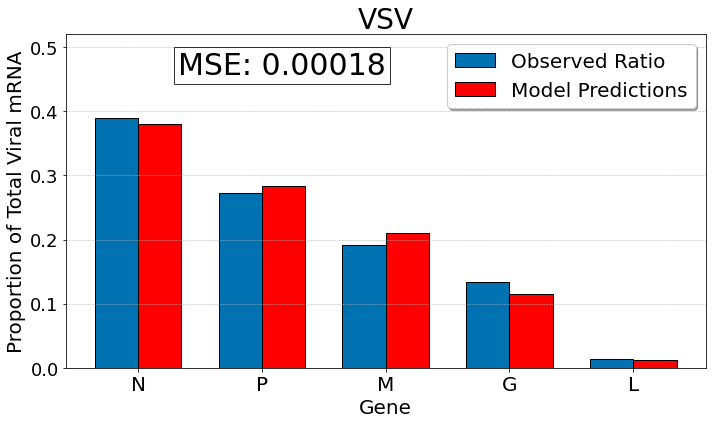

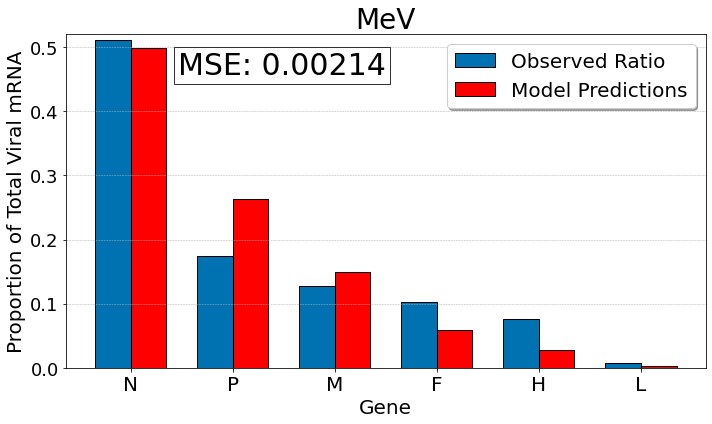

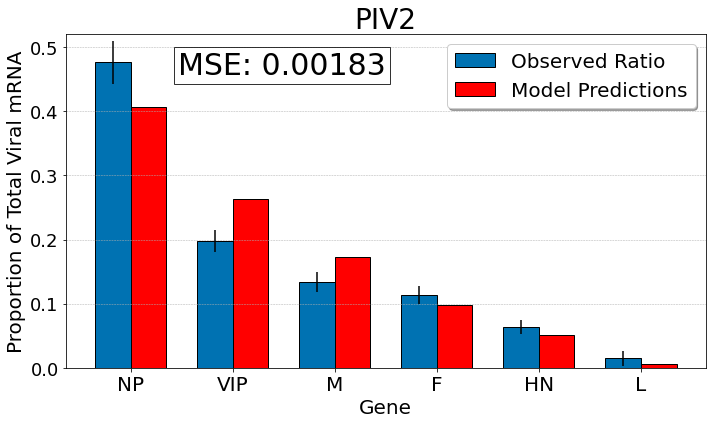

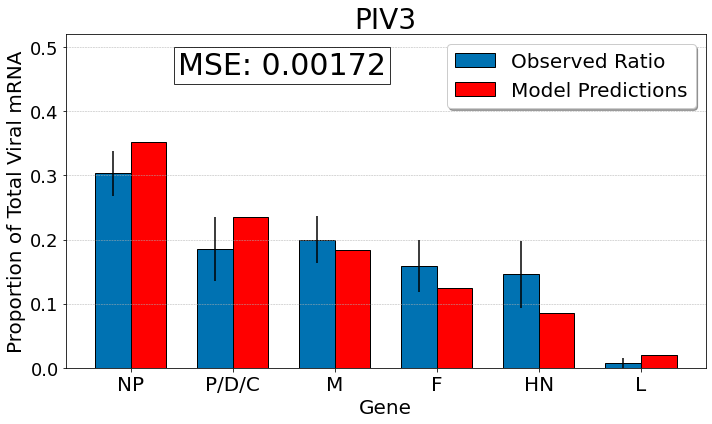

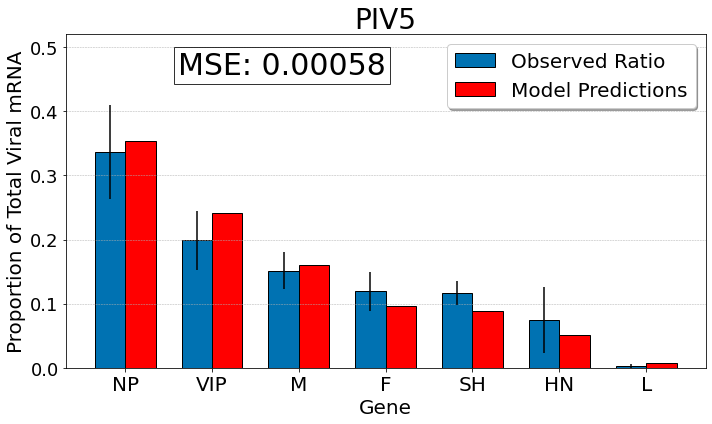

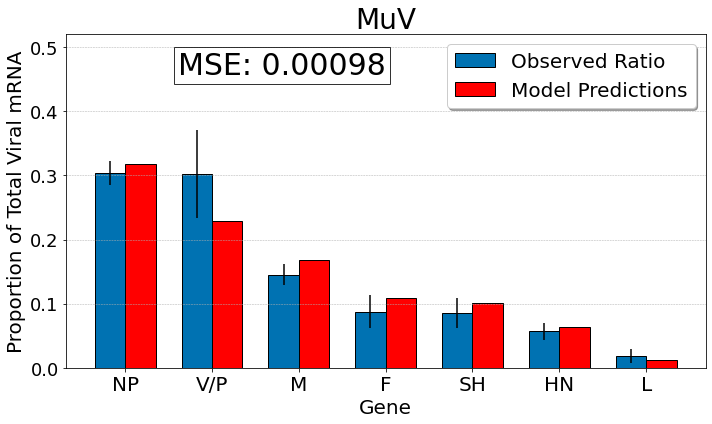

In [101]:
# Generate barplots of observed gradients and predicted gradients

for i in range(len(viruses)):
    genome_pos = virus_genome_pos[i]
    pars = best_fit_pars.iloc[i]
    pred = np.array([pars**x for x in genome_pos])
    pred_norm = pred/np.sum(pred)
    
    categories = virus_gene_names[i]
    indices = np.arange(len(categories))
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    # Create bars
    bar_width = 0.35
    ax.set_title(f'{viruses[i]}', fontsize=28)
    # Create bars for virus_means[i]
    ax.bar(indices - bar_width/2, virus_means[i], width=bar_width, yerr= 2 * np.array(virus_sd[i]), color='#0072B2', edgecolor='black', label='Observed Ratio')
    # Increase y-axis label size
    ax.tick_params(axis='y', labelsize=18)
    # Create bars for pred_norm
    ax.bar(indices + bar_width/2, pred_norm, width=bar_width, color='red', edgecolor='black', label='Model Predictions')
    # Set legend with improved positioning and styling
    ax.legend(loc='best', fontsize=20, frameon=True, shadow=True)
    # Set labels, title, and ticks
    ax.set_xticks(indices)
    plt.ylim([0,.52])
    mse = np.mean( (np.array(pred_norm) - np.array(virus_means[i]))**2 )

    ax.set_xticklabels(categories, fontsize=20)
    ax.set_ylabel('Proportion of Total Viral mRNA', fontsize=20)
    ax.set_xlabel('Gene', fontsize=20)
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)
    
    ax.text(0.5, 0.95, f'MSE: {mse:.5f}', transform=ax.transAxes, fontsize=30,
            verticalalignment='top', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig(f"Figures/Fig2/{viruses[i]}_Gradients.svg")
    plt.show()   
    
    
    

In [129]:

# Compile all fit stats into a single file

dfs = pd.DataFrame()
for i in range(len(viruses)):
    df = pd.read_csv((f"File2-Top_100_Fit_Stats/{viruses[i]}_fits.csv"))
    dfs = pd.concat([dfs, df])
dfs.iloc[:,0] = viruses
dfs.index = viruses
print(1 / (1-dfs.iloc[:,1]))
dfs.iloc[:,2] = dfs.iloc[:,2].apply(lambda x: '{:.2e}'.format(x))
dfs.iloc[:,-1] = dfs.iloc[:,-1].apply(lambda x: '{:.2e}'.format(x))
dfs = dfs.round(5)
dfs.iloc[:, 0] = ["p(walk)"] * len(dfs.iloc[:, 0])
dfs.columns = ["Parameter"] + list(dfs.columns)[1:]
dfs.to_csv("File2-Top_100_Fit_Stats/All_Viruses_Simple_Gradient.csv")
dfs

VSV     2782.265487
MeV     2585.124158
PIV2    3304.991801
PIV3    4830.628992
PIV5    3415.794551
MuV     4051.929932
Name: Mean of Top 100 Fit Estimates, dtype: float64


,Parameter,Mean of Top 100 Fit Estimates,Std of Top 100 Fit Estimates,Max of Top 100 Fit Estimates,Min of Top 1% Fit Estimates,Best Fit Estimate,Best Fit NMSE
VSV,p(walk),0.99964,6.56e-11,0.99964,0.99964,0.99964,1.79e-04
MeV,p(walk),0.99961,1.32e-09,0.99961,0.99961,0.99961,2.14e-03
PIV2,p(walk),0.99970,8.67e-12,0.99970,0.99970,0.99970,1.80e+01
PIV3,p(walk),0.99979,8.18e-10,0.99979,0.99979,0.99979,5.57e+00
PIV5,p(walk),0.99971,1.26e-10,0.99971,0.99971,0.99971,3.39e+00
MuV,p(walk),0.99975,6.78e-10,0.99975,0.99975,0.99975,3.12e+00
